task1

In [3]:

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

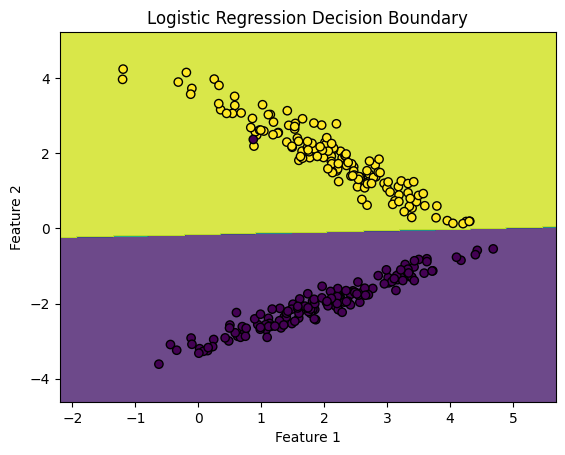

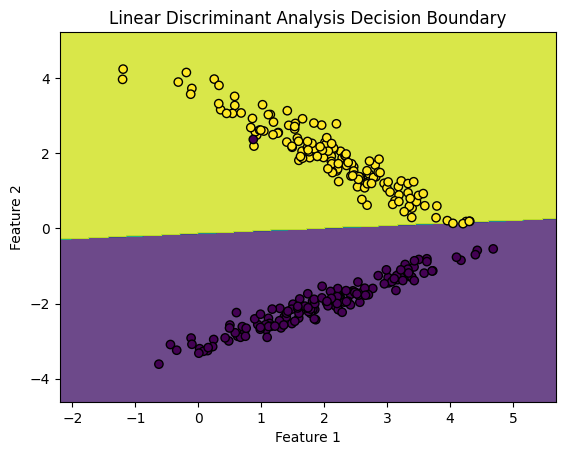

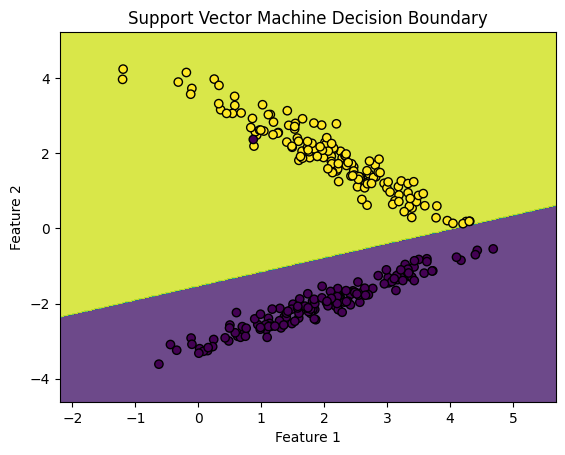

In [4]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=2.0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Support Vector Machine': SVC(kernel='linear')
}

metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': []}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(acc)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)

def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

for model_name, model in models.items():
    plot_decision_boundary(model, X_test, y_test, f"{model_name} Decision Boundary")



task2

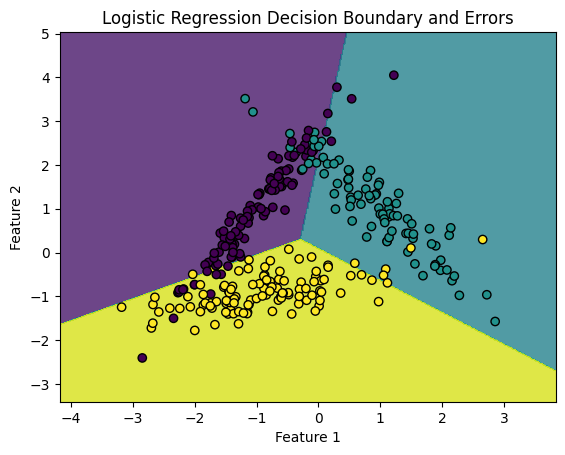

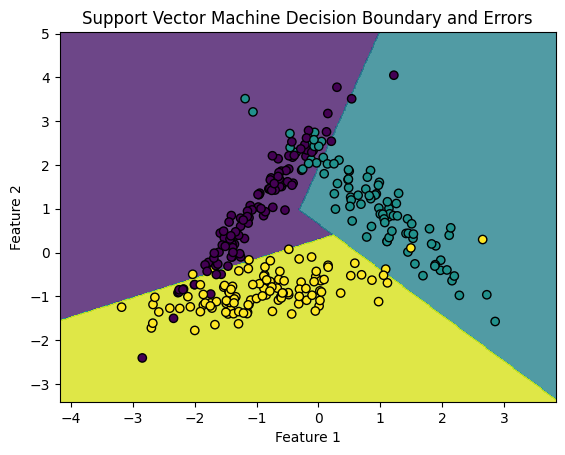

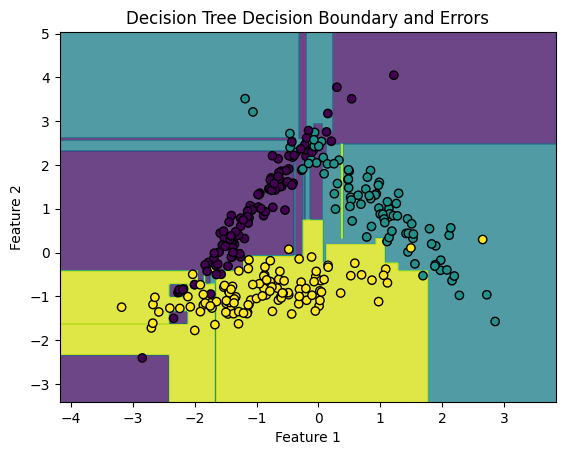

In [5]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, n_classes=3, class_sep=1.0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(multi_class='ovr', max_iter=1000),
    'Support Vector Machine': SVC(kernel='linear', decision_function_shape='ovr'),
    'Decision Tree': DecisionTreeClassifier()
}
metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': []}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(acc)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    
def plot_decision_boundary_and_errors(model, X, y, title):
    h = .02  
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
    
for model_name, model in models.items():
    plot_decision_boundary_and_errors(model, X_test, y_test, f"{model_name} Decision Boundary and Errors")

task3

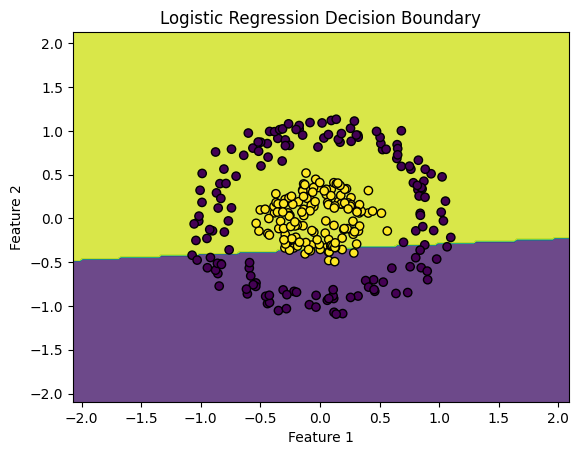

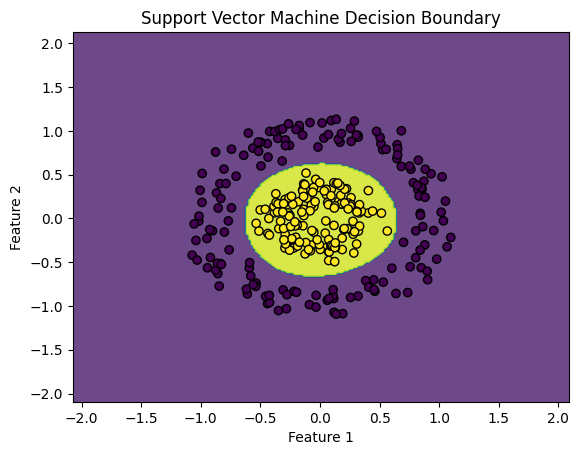

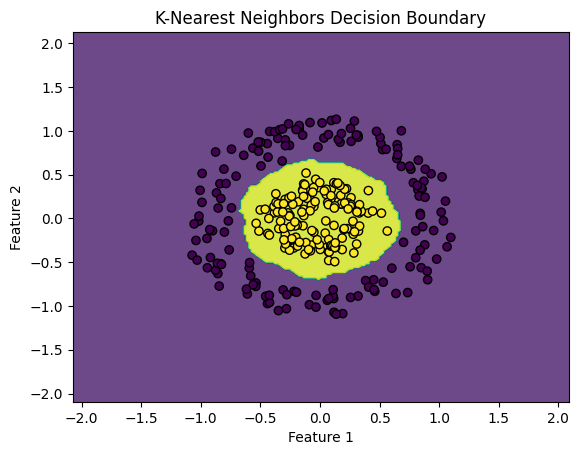

In [9]:
from sklearn.datasets import make_circles
from sklearn.neighbors import KNeighborsClassifier

X, y = make_circles(n_samples=1000, factor=0.3, noise=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(kernel='rbf'),  
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': []}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(acc)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)

def plot_decision_boundary(model, X, y, title):
    h = .02  
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

for model_name, model in models.items():
    plot_decision_boundary(model, X_test, y_test, f"{model_name} Decision Boundary")



task4

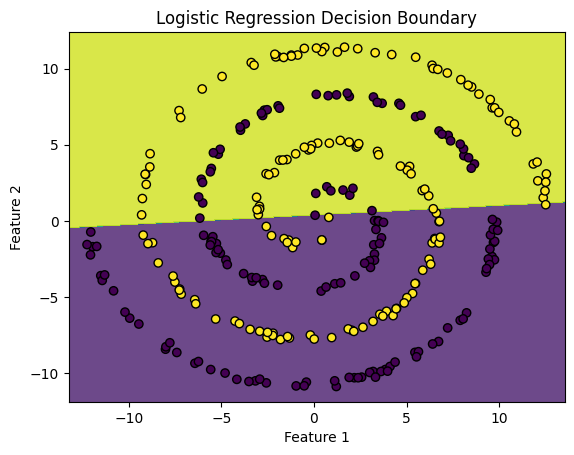

In [10]:
def generate_spiral(n_points, noise=0.5):
    n = np.sqrt(np.random.rand(n_points//2)) * 720 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points//2) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points//2) * noise
    d2x = np.cos(n)*n + np.random.rand(n_points//2) * noise
    d2y = -np.sin(n)*n + np.random.rand(n_points//2) * noise

    X = np.concatenate([np.vstack((d1x,d1y)).T, np.vstack((d2x,d2y)).T])
    y = np.concatenate([np.zeros(n_points//2), np.ones(n_points//2)])
    return X, y

X, y = generate_spiral(1000)

models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(kernel='rbf'),  
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': []}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(acc)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)

def plot_decision_boundary(model, X, y, title):
    h = .02 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

for model_name, model in models.items():
    plot_decision_boundary(model, X_test, y_test, f"{model_name} Decision Boundary")